# Bean Plant Disease Detection Model Training

# Preprocessing the Dataset

In [2]:
#importing the required modules

import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [34]:
#defining some constant values
BATCH_SIZE = 32     
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=40   #epoch is the one entire passing of training data into the algorithm

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(     #load the image from the directory 
    "Plant Disease",                                               #name of the dataset
    seed=123,
    shuffle=True,                                                  #Shuffle the images randomly
    image_size=(IMAGE_SIZE,IMAGE_SIZE),                            #calling the image size
    batch_size=BATCH_SIZE                                          #calling the bacth size
)

Found 1295 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names        #find the name of three class
class_names

['angular_leaf_spot', 'bean_rust', 'healthy']

In [6]:
len(dataset)  #length of the dataset after batching here all batch = 32 files, last batch will have 15files

41

In [7]:
for image_batch, label_batch in dataset.take(1): #here take one batch to find the batch size, image size, rgb channel value
    print(image_batch.shape)
    print(label_batch.numpy())                   #display in numpy array 
    
# labels of the class
# 0=angular_leaf_spot, 1=bean_rust, 2=healthy

(32, 256, 256, 3)
[1 0 2 0 2 1 2 0 1 0 2 2 0 0 0 1 1 2 0 1 2 0 2 0 2 1 0 2 0 1 1 1]


In [8]:
#print the 1st image of the batch 1 

for image_batch, label_batch in dataset.take(1):
    # print(image_batch[0])       #in tensor format
    print(image_batch[0].numpy)   #in numpy 

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[159.82263 , 120.82263 , 115.82263 ],
        [157.87048 , 118.87048 , 113.87048 ],
        [134.92316 ,  96.92316 ,  93.92316 ],
        ...,
        [ 86.181335,  53.181335,  46.181335],
        [ 89.63483 ,  56.634827,  49.634827],
        [ 91.62726 ,  58.62726 ,  51.62726 ]],

       [[156.61682 , 117.61682 , 112.61682 ],
        [147.36224 , 108.36224 , 103.36224 ],
        [134.47205 ,  94.472046,  92.472046],
        ...,
        [ 88.15723 ,  55.157227,  48.157227],
        [ 94.54529 ,  63.545288,  58.545288],
        [ 79.92798 ,  48.92798 ,  43.92798 ]],

       [[124.13385 ,  87.13385 ,  81.13385 ],
        [116.111084,  77.111084,  72.111084],
        [124.62427 ,  83.62427 ,  81.62427 ],
        ...,
        [ 81.27106 ,  50.271057,  45.271057],
        [ 77.961975,  46.961975,  43.961975],
        [ 83.026794,  52.026794,  49.026794]],

       ...,

       [[117.91052 

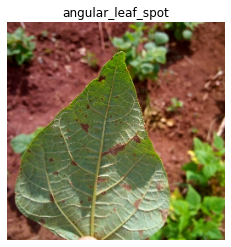

In [9]:
#display the image

for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))  #show 1st img and change the type as int (sometimes it may be float)
    plt.title(class_names[label_batch[0]])   #show title 
    plt.axis("off")    #remove the axis values

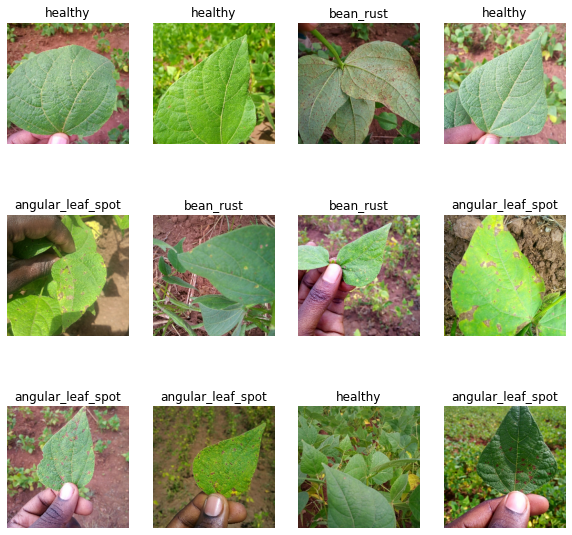

In [10]:
#display 12 images
plt.figure(figsize=(10, 10))  #image dimension in subplot

for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)  #create subplot of 3*4 matrix
        plt.imshow(image_batch[i].numpy().astype("uint8"))  
        plt.title(class_names[label_batch[i]])   
        plt.axis("off")    

# Perform train test Split

In [11]:
# Here 80% of data is used for Training 
# 10% = validation
# 10% = testing

In [12]:
len(dataset) #length of the dataset

41

In [13]:
train_size = 0.8      #define the size of train
len(dataset)*train_size

32.800000000000004

In [14]:
train_ds = dataset.take(32)    #take 32 batch from 41 as train data 
len(train_ds)

32

In [15]:
test_ds = dataset.skip(32)    #take the remaining 9 batch as test data. #skip here act as slicing operator
len(test_ds)

9

In [16]:
val_size = 0.1      #define the size of validation 
len(dataset)*val_size

4.1000000000000005

In [17]:
val_ds = test_ds.take(4)   #take 4 batch from test data as validation data
len(val_ds)

4

In [18]:
test_ds = test_ds.skip(4)  #now test will have 5 batch after spliting val data from it (9-4 = 5)
len(test_ds)

5

In [19]:
#A simple code for train test split using a function

def get_dataset_partition_tf(ds, train_split=0.8, test_split=0.1, val_split=0.1, shuffle=True, shuffle_size=10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, test_ds, val_ds

In [21]:
train_ds, val_ds, test_ds = get_dataset_partition_tf(dataset)

In [22]:
len(train_ds)   #train_split

32

In [23]:
len(test_ds)    #test_split

4

In [24]:
len(val_ds)     #val_split

5

Catch, Prefetch and Shuffle data

In [25]:
# This is basically done to make the model to perform better the system
# "Cache" will cache the dataset and store it in memory during one epoch and it will reuse the data for next epoch
# "Prefetch" will load the next data when the 1st training is performing. This will save the time.
# Here buffer_size is automatically done by tensor

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

#Here the Data is optimized for training

In [26]:
#Image resizing and rescaling
#This is one of the Layer of Model

rescale_and_resize = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE), #Img is resize when a input img is not in the required size during the use of app
    layers.experimental.preprocessing.Rescaling(1.0/255) #Rescaling is done reduce the numpy array of RGB value to 0 to 1
]) 

Data Augmentation

In [27]:
# This is done to Augment the image for better performence when the input is in any form

data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

# Model Building 

In [28]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    rescale_and_resize,  #adding this layer
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape = input_shape), #32=filters
    layers.MaxPooling2D((2,2)),   #perform pooling 
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),    #flatten the last pooling layer
    layers.Dense(64, activation='relu'),  #relu is an activation which is used for better performance
    layers.Dense(n_classes, activation='softmax'), #softmax normalize the probability of the classes
])

model.build(input_shape = input_shape)

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

Compiling the Model

In [30]:
model.compile(
    optimizer='adam',  
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [35]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS
)

Epoch 1/40
32/32 [==============================] - 38s 1s/step - loss: 0.0508 - accuracy: 0.9871 - val_loss: 0.1832 - val_accuracy: 0.9375
Epoch 2/40
32/32 [==============================] - 37s 1s/step - loss: 0.0321 - accuracy: 0.9930 - val_loss: 0.2034 - val_accuracy: 0.9438
Epoch 3/40
32/32 [==============================] - 39s 1s/step - loss: 0.0388 - accuracy: 0.9921 - val_loss: 0.1155 - val_accuracy: 0.9625
Epoch 4/40
32/32 [==============================] - 42s 1s/step - loss: 0.0117 - accuracy: 0.9990 - val_loss: 0.1621 - val_accuracy: 0.9688
Epoch 5/40
32/32 [==============================] - 42s 1s/step - loss: 0.0062 - accuracy: 0.9990 - val_loss: 0.1648 - val_accuracy: 0.9688
Epoch 6/40
32/32 [==============================] - 42s 1s/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.1421 - val_accuracy: 0.9625
Epoch 7/40
32/32 [==============================] - 47s 1s/step - loss: 2.8731e-04 - accuracy: 1.0000 - val_loss: 0.1466 - val_accuracy: 0.9688
Epoch 8/40
32/32

In [78]:
scores = model.evaluate(test_ds)

4/4 [==============================] - 1s 231ms/step - loss: 1.4434 - accuracy: 0.9099


In [37]:
scores

[1.4433538913726807, 0.9099099040031433]

In [38]:
history.params

{'verbose': 1, 'epochs': 40, 'steps': 32}

In [39]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [40]:
type(history.history['loss'])

list

In [41]:
len(history.history['loss'])

40

In [42]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.05075021833181381,
 0.032102327793836594,
 0.03876379504799843,
 0.011674465611577034,
 0.0062439762987196445]

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

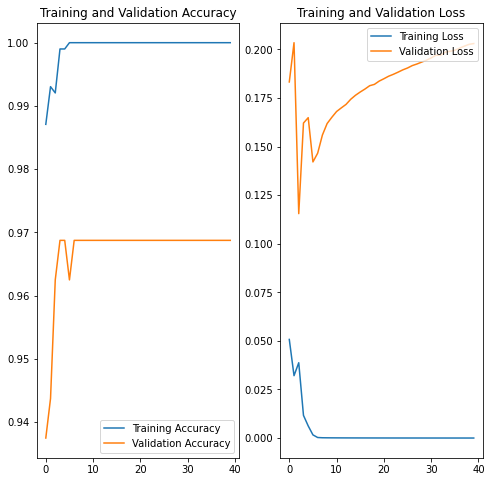

In [44]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: bean_rust
1/1 [==============================] - 0s 347ms/step
predicted label: bean_rust


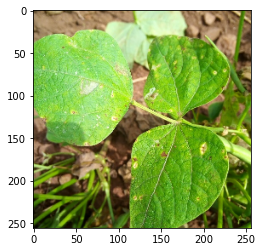

In [93]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [94]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 58ms/step


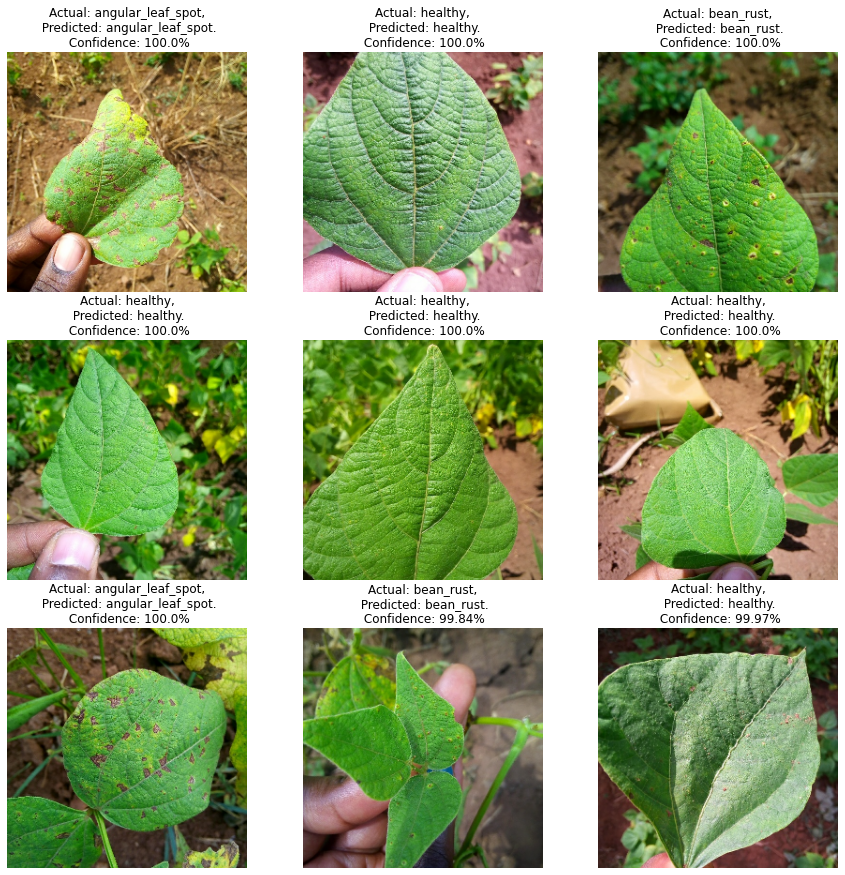

In [97]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")